# Imports and Constants

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from collections import defaultdict
import itertools
import pickle
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

sys.path.append('../')
from batchers import dataset_constants
from utils.analysis import (
    calc_score,
    chunk_vs_score,
    evaluate_df,
    evaluate,
    plot_chunk_vs_score,
    plot_label_vs_score,
    plot_percdata_vs_score,
    sorted_scores)
from utils.general import colordisplay, load_npz
from utils.plot import scatter_preds, symmetric_heatmap

In [3]:
OUTPUTS_ROOT_DIR = '../outputs'
PLOTS_DIR = os.path.join(OUTPUTS_ROOT_DIR,'dhs_ooc/results/plots/interval')
os.makedirs(PLOTS_DIR, exist_ok=True)
SUM_DIR = os.path.join(OUTPUTS_ROOT_DIR,'dhs_ooc/results/summary')
os.makedirs(SUM_DIR, exist_ok=True)

MODEL_NAME_TO_DIR = {
    'SC':{
        'PCA':{
            'MSI':{
                'Ridge':{
                    '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/95',
                    '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/90',
                    '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/80'
                },
                'RF':{
                    '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/95',
                    '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/90',
                    '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/80'
                },
                'XGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_XGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_XGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_XGBoost/80'
                }
            },
            'NLI':{
                'Ridge':{
                    '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_Ridge/95',
                    '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_Ridge/90',
                    '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_Ridge/80'
                },
                'RF':{
                    '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_RF/95',
                    '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_RF/90',
                    '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_RF/80'
                },
                'XGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_XGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_XGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_XGBoost/80'
                }
            },
            'MSNLI':{
                'Ridge':{
                    '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_Ridge/95',
                    '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_Ridge/90',
                    '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_Ridge/80'
                },
                'RF':{
                    '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_RF/95',
                    '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_RF/90',
                    '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_RF/80'
                },
                'XGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_XGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_XGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_XGBoost/80'
                }
            }
        },
#         'UMAP':{
#             'ms':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_XGBoost/80'
#                 }
#             },
#             'nl':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_XGBoost/80'
#                 }
#             },
#             'msnl':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_XGBoost/80'
#                 }
#             }
#         }
    },
#     'SC-KDE':{
#         'PCA':{
#             'ms':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_Ridge/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_Ridge/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_RF/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_RF/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_XGBoost/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_XGBoost/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/SC_KDE_XGBoost/80'
#                 }
#             },
#             'nl':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_Ridge/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_Ridge/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_RF/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_RF/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_XGBoost/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_XGBoost/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/SC_KDE_XGBoost/80'
#                 }
#             },
#             'msnl':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_Ridge/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_Ridge/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_RF/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_RF/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_XGBoost/95',
#                     '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_XGBoost/90',
#                     '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/SC_KDE_XGBoost/80'
#                 }
#             }
#         },
#         'UMAP':{
#             'ms':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/SC_XGBoost/80'
#                 }
#             },
#             'nl':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/SC_XGBoost/80'
#                 }
#             },
#             'msnl':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/SC_XGBoost/80'
#                 }
#             }
#         }
#     },
    'J_aB':{
        'PCA':{
            'MSI':{
                'Ridge':{
                    '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_Ridge/95',
                    '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_Ridge/90',
                    '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_Ridge/80'
                    
                },
                'RF':{
                    '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_RF/95',
                    '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_RF/90',
                    '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_RF/80'
                },
                'XGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_XGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_XGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_XGBoost/80'
                }
            },
            'NLI':{
                'Ridge':{
                    '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_Ridge/95',
                    '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_Ridge/90',
                    '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_Ridge/80'
                },
                'RF':{
                    '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_RF/95',
                    '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_RF/90',
                    '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_RF/80'
                },
                'XGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_XGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_XGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/J_aB_XGBoost/80'
                }
            },
            'MSNLI':{
                'Ridge':{
                    '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_Ridge/95',
                    '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_Ridge/90',
                    '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_Ridge/80'
                },
                'RF':{
                    '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_RF/95',
                    '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_RF/90',
                    '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_RF/80'
                },
                'XGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_XGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_XGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/J_aB_XGBoost/80'
                }
            }
        },
#         'UMAP':{
#             'ms':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/J_aB_XGBoost/80'
#                 }
#             },
#             'nl':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/J_aB_XGBoost/80'
#                 }
#             },
#             'msnl':{
#                 'Ridge':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_Ridge/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_Ridge/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_Ridge/80'
#                 },
#                 'RF':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_RF/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_RF/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_RF/80'
#                 },
#                 'XGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_XGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_XGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/J_aB_XGBoost/80'
#                 }
#             }
#         }
    },
    'NGB':{
        'PCA':{
            'MSI':{
                'NGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_ms_pca099/NGB/NGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_ms_pca099/NGB/NGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_ms_pca099/NGB/NGBoost/80'
                }
            },
            'NLI':{
                'NGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_nl_pca099/NGB/NGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_nl_pca099/NGB/NGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_nl_pca099/NGB/NGBoost/80'
                }
            },
            'MSNLI':{
                'NGBoost':{
                    '95': 'dhs_ooc/PCA_099/resnet_msnl_pca099/NGB/NGBoost/95',
                    '90': 'dhs_ooc/PCA_099/resnet_msnl_pca099/NGB/NGBoost/90',
                    '80': 'dhs_ooc/PCA_099/resnet_msnl_pca099/NGB/NGBoost/80'
                }
            }
        },
#         'UMAP':{
#             'ms':{
#                 'NGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_ms_UMAP/NGB/NGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_ms_UMAP/NGB/NGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_ms_UMAP/NGB/NGBoost/80'
#                 }
#             },
#             'nl':{
#                 'NGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_nl_UMAP/NGB/NGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_nl_UMAP/NGB/NGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_nl_UMAP/NGB/NGBoost/80'
#                 }
#             },
#             'msnl':{
#                 'NGBoost':{
#                     '95': 'dhs_ooc/UMAP/resnet_msnl_UMAP/NGB/NGBoost/95',
#                     '90': 'dhs_ooc/UMAP/resnet_msnl_UMAP/NGB/NGBoost/90',
#                     '80': 'dhs_ooc/UMAP/resnet_msnl_UMAP/NGB/NGBoost/80'
#                 }
#             }
#         }
    }
}

In [4]:
POINT_MODEL_NAME_TO_DIR = {
    'PCA':{
        'MSI':{
            'Ridge': 'dhs_ooc/PCA_099/resnet_ms_pca099/ridge_logo_pca099/test_preds.npz',
            'RF': 'dhs_ooc/PCA_099/resnet_ms_pca099/RF_logo_pca099/RF_all_preds.csv',
            'XGBoost': 'dhs_ooc/PCA_099/resnet_ms_pca099/XGBoost_logo_pca099/XGBoost_all_preds_pca099.csv',
            'NGBoost': 'dhs_ooc/PCA_099/resnet_ms_pca099/NGB/NGBoost/95/point_preds.csv'
        },
        'NLI':{
            'Ridge': 'dhs_ooc/PCA_099/resnet_nl_pca099/ridge_logo_pca099/test_preds.npz',
            'RF': 'dhs_ooc/PCA_099/resnet_nl_pca099/RF_logo_pca099/RF_all_preds.csv',
            'XGBoost': 'dhs_ooc/PCA_099/resnet_nl_pca099/XGBoost_logo_pca099/XGBoost_all_preds_pca099.csv',
            'NGBoost': 'dhs_ooc/PCA_099/resnet_nl_pca099/NGB/NGBoost/95/point_preds.csv'
        },
        'MSNLI':{
            'Ridge': 'dhs_ooc/PCA_099/resnet_msnl_pca099/ridge_logo_pca099/test_preds.npz',
            'RF': 'dhs_ooc/PCA_099/resnet_msnl_pca099/RF_logo_pca099/RF_all_preds.csv',
            'XGBoost': 'dhs_ooc/PCA_099/resnet_msnl_pca099/XGBoost_logo_pca099/XGBoost_all_preds_pca099.csv',
            'NGBoost': 'dhs_ooc/PCA_099/resnet_msnl_pca099/NGB/NGBoost/95/point_preds.csv'
        }
    },
    'UMAP':{
        'MSI':{
            'Ridge': 'dhs_ooc/UMAP/resnet_ms_UMAP/ridge_logo_UMAP/test_preds.npz',
            'RF': 'dhs_ooc/UMAP/resnet_ms_UMAP/RF_logo_UMAP/RF_all_preds.csv',
            'XGBoost': 'dhs_ooc/UMAP/resnet_ms_UMAP/XGBoost_logo_UMAP/XGBoost_all_preds_UMAP.csv',
            'NGBoost': 'dhs_ooc/UMAP/resnet_ms_UMAP/NGB/NGBoost/95/point_preds.csv'
        },
        'NLI':{
            'Ridge': 'dhs_ooc/UMAP/resnet_nl_UMAP/ridge_logo_UMAP/test_preds.npz',
            'RF': 'dhs_ooc/UMAP/resnet_nl_UMAP/RF_logo_UMAP/RF_all_preds.csv',
            'XGBoost': 'dhs_ooc/UMAP/resnet_nl_UMAP/XGBoost_logo_UMAP/XGBoost_all_preds_UMAP.csv',
            'NGBoost': 'dhs_ooc/UMAP/resnet_nl_UMAP/NGB/NGBoost/95/point_preds.csv'
        },
        'MSNLI':{
            'Ridge': 'dhs_ooc/UMAP/resnet_msnl_UMAP/ridge_logo_UMAP/test_preds.npz',
            'RF': 'dhs_ooc/UMAP/resnet_msnl_UMAP/RF_logo_UMAP/RF_all_preds.csv',
            'XGBoost': 'dhs_ooc/UMAP/resnet_msnl_UMAP/XGBoost_logo_UMAP/XGBoost_all_preds_UMAP.csv',
            'NGBoost': 'dhs_ooc/UMAP/resnet_msnl_UMAP/NGB/NGBoost/95/point_preds.csv'
        }
    },
    'The raw':{
        'MSI':{
            'Resnet': 'dhs_ooc/raw/resnet_ms/resnet_ms_preds.csv',
            'Ridge': 'dhs_ooc/raw/resnet_ms/ridge_logo/test_preds.npz'
        },
        'NLI':{
            'Resnet': 'dhs_ooc/raw/resnet_nl/resnet_nl_preds.csv',
            'Ridge': 'dhs_ooc/raw/resnet_nl/ridge_logo/test_preds.npz'
        },
        'MSNLI':{
            'Ridge': 'dhs_ooc/raw/resnet_msnl/ridge_logo/test_preds.npz'
        }
    }
}

# 汇总all_interval_benchmarks

In [5]:
def sum_all_interval_benchmarks():
    df = pd.DataFrame(columns = ['PICP','PINAW','CWC','Winkler_Score','reduction','image_type','point_method','interval_method','nominal_level','method', 'path'])
    i = 0
    for interval_method, interval_method_info in MODEL_NAME_TO_DIR.items():
        for reduction, reduction_info in interval_method_info.items():
            for image_type, image_type_info in reduction_info.items():
                for point_method, point_method_info in image_type_info.items():
                    for nominal_level, path in point_method_info.items():
                        df.loc[i, 'interval_method'] = interval_method
                        df.loc[i, 'reduction'] = reduction
                        df.loc[i, 'image_type'] = image_type
                        df.loc[i, 'point_method'] = point_method
                        df.loc[i, 'nominal_level'] = nominal_level
                        df.loc[i, 'path'] = path
                        df.loc[i, 'method'] = path.split('/')[-2]
                        interval_benchmarks=pd.read_csv(os.path.join(OUTPUTS_ROOT_DIR,path,'all_interval_benchmarks.csv'),dtype = np.float32)
                        df.loc[i, 'PICP'] = interval_benchmarks.loc[0,'PICP']
                        df.loc[i, 'PINAW'] = interval_benchmarks.loc[0,'PINAW']
                        df.loc[i, 'CWC'] = interval_benchmarks.loc[0,'CWC']
                        Winkler_Score=pd.read_csv(os.path.join(OUTPUTS_ROOT_DIR,path,'Winkler_Score.csv'),header = 0,names = ['Winkler_Score'])
                        df.loc[i, 'Winkler_Score'] = round(Winkler_Score.loc[0,'Winkler_Score'],3)
                        i = i+1
    return df

In [6]:
df_all = sum_all_interval_benchmarks()
df_all

,PICP,PINAW,CWC,Winkler_Score,reduction,image_type,point_method,interval_method,nominal_level,method,path
0,0.896,0.423,2.055,2.825,PCA,MSI,Ridge,SC,95,SC_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/95
1,0.779,0.303,6.543,2.517,PCA,MSI,Ridge,SC,90,SC_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/90
2,0.542,0.173,109.63,2.191,PCA,MSI,Ridge,SC,80,SC_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/80
3,0.94,0.123,0.281,0.723,PCA,MSI,RF,SC,95,SC_RF,dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/95
4,0.886,0.09,0.218,0.567,PCA,MSI,RF,SC,90,SC_RF,dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/90
...,...,...,...,...,...,...,...,...,...,...,...
58,0.894,0.362,0.783,1.961,PCA,NLI,NGBoost,NGB,90,NGBoost,dhs_ooc/PCA_099/resnet_nl_pca099/NGB/NGBoost/90
59,0.797,0.282,0.586,1.617,PCA,NLI,NGBoost,NGB,80,NGBoost,dhs_ooc/PCA_099/resnet_nl_pca099/NGB/NGBoost/80
60,0.926,0.406,1.146,2.334,PCA,MSNLI,NGBoost,NGB,95,NGBoost,dhs_ooc/PCA_099/resnet_msnl_pca099/NGB/NGBoost/95
61,0.871,0.34,1.042,1.962,PCA,MSNLI,NGBoost,NGB,90,NGBoost,dhs_ooc/PCA_099/resnet_msnl_pca099/NGB/NGBoost/90


In [7]:
sort_df_all = df_all.sort_values(by='CWC', ascending=True).round(3)
sort_df_all

,PICP,PINAW,CWC,Winkler_Score,reduction,image_type,point_method,interval_method,nominal_level,method,path
23,0.792,0.037,0.082,0.261,PCA,MSNLI,RF,SC,80,SC_RF,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_RF/80
14,0.79,0.04,0.091,0.348,PCA,NLI,RF,SC,80,SC_RF,dhs_ooc/PCA_099/resnet_nl_pca099/SC_RF/80
22,0.895,0.056,0.119,0.35,PCA,MSNLI,RF,SC,90,SC_RF,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_RF/90
13,0.889,0.066,0.153,0.48,PCA,NLI,RF,SC,90,SC_RF,dhs_ooc/PCA_099/resnet_nl_pca099/SC_RF/90
5,0.78,0.06,0.159,0.429,PCA,MSI,RF,SC,80,SC_RF,dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/80
...,...,...,...,...,...,...,...,...,...,...,...
17,0.572,0.169,50.678,1.878,PCA,NLI,XGBoost,SC,80,SC_XGBoost,dhs_ooc/PCA_099/resnet_nl_pca099/SC_XGBoost/80
20,0.555,0.162,74.219,1.938,PCA,MSNLI,Ridge,SC,80,SC_Ridge,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_Ridge/80
26,0.552,0.159,78.506,1.921,PCA,MSNLI,XGBoost,SC,80,SC_XGBoost,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_XGBoost/80
2,0.542,0.173,109.63,2.191,PCA,MSI,Ridge,SC,80,SC_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/80


In [8]:
df_PCA_ms = df_all[(df_all['reduction']=='PCA') & (df_all['image_type']=='MSI') & (df_all['nominal_level']=='95')]
df_PCA_nl = df_all[(df_all['reduction']=='PCA') & (df_all['image_type']=='NLI') & (df_all['nominal_level']=='95')]
df_PCA_msnl = df_all[(df_all['reduction']=='PCA') & (df_all['image_type']=='MSNLI') & (df_all['nominal_level']=='95')]
# df_UMAP_ms = df_all[(df_all['reduction']=='UMAP') & (df_all['image_type']=='ms') & (df_all['nominal_level']=='95')]
# df_UMAP_nl = df_all[(df_all['reduction']=='UMAP') & (df_all['image_type']=='nl') & (df_all['nominal_level']=='95')]
# df_UMAP_msnl = df_all[(df_all['reduction']=='UMAP') & (df_all['image_type']=='msnl') & (df_all['nominal_level']=='95')]

In [31]:
def interval_plot(plot_name, data, indicator, title, legend_loc):
    sns.set(style='white',font_scale=1.5)
    plot = sns.barplot(x='method', y=indicator, hue='interval_method', data=data, dodge=False, ci=None, palette = "YlGnBu")
    plot.margins(y=0.1)
    plot.set_xticklabels(labels = ['SC_Ridge','SC_RF','SC_XGBoost','J+aB_Ridge','J+aB_RF','J+aB_XGBoost','NGBoost'],rotation = 90,fontsize = 25)
    #plot.legend(loc = legend_loc, labels=['SC', 'SC-KDE', 'J+aB', 'NGB'])
    plot.legend(loc = legend_loc, labels=['SC', 'J+aB', 'NGB'])
    
    if (indicator == 'PICP')|(indicator == 'Winkler_Score'):
        plot.set_title(title,fontsize=28)
    plot.yaxis.label.set_size(30)
    if (indicator == 'PICP') | (indicator == 'PINAW'):
        plot.axes.get_xaxis().set_visible(False)
    
    for bar in plot.patches:
        plot.annotate(format(bar.get_height(), '.2f'),
                           (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center',
                           size=20, xytext=(0, -10),
                           textcoords='offset points')
        
#     if (indicator == 'PICP')&(indicator == 'PINAW'):
#         plt.xticks([])  # 去掉横坐标值 
    if (indicator == 'CWC')&(plot_name.split('_')[0]=='u'):
        plt.ylim(0,2.25)
    if (indicator == 'CWC')&(plot_name.split('_')[0]=='p'):
        plt.ylim(0,2.1)
    if indicator == 'PICP':
        plt.axhline(y=0.95, ls='--', c='black')
        plt.ylim(0,1)
    if (indicator == 'PINAW')&(plot_name.split('_')[0]=='u'):
        plt.ylim(0,0.5)
    if (indicator == 'PINAW')&(plot_name.split('_')[0]=='p'):
        plt.ylim(0,0.6)
    if (indicator == 'Winkler_Score'):  
        plt.ylabel('Winkler Score')
        plt.ylim(0,3.0)
    plt.savefig(os.path.join(PLOTS_DIR,plot_name),dpi=500,bbox_inches = 'tight')
    plt.show()

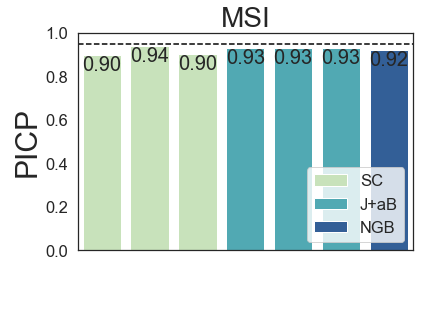

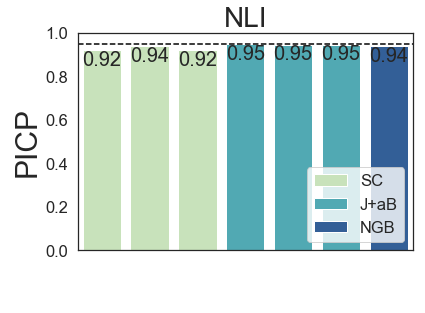

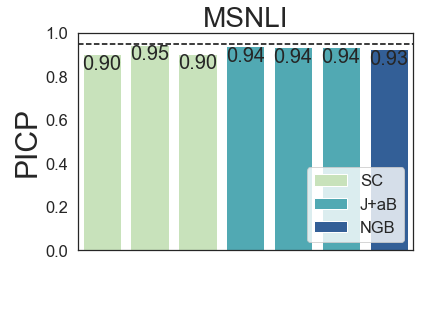

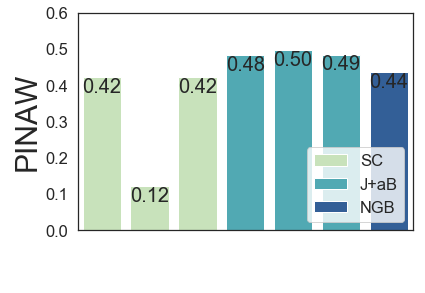

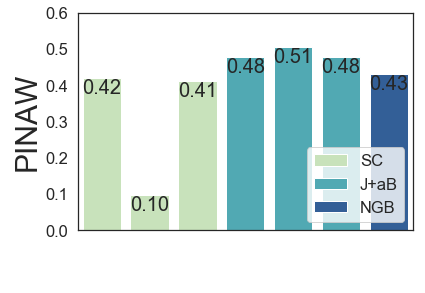

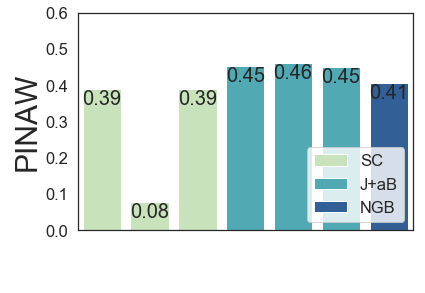

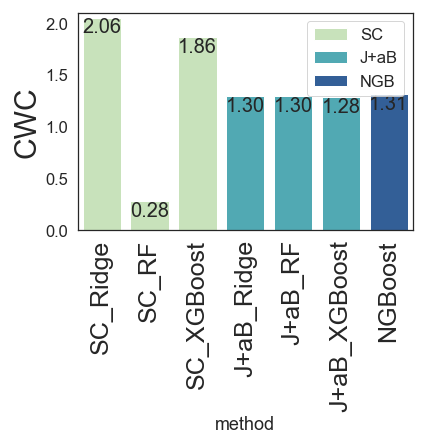

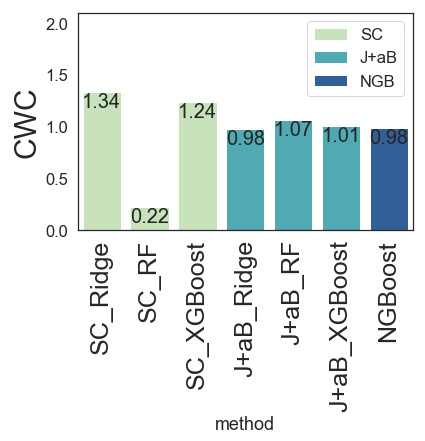

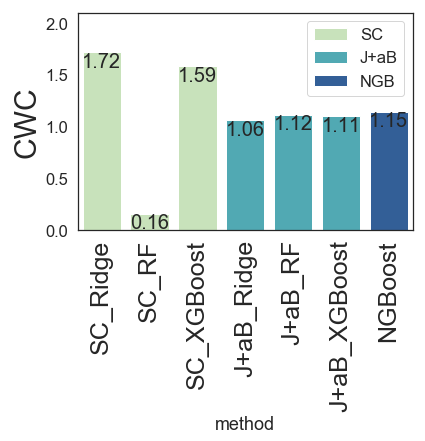

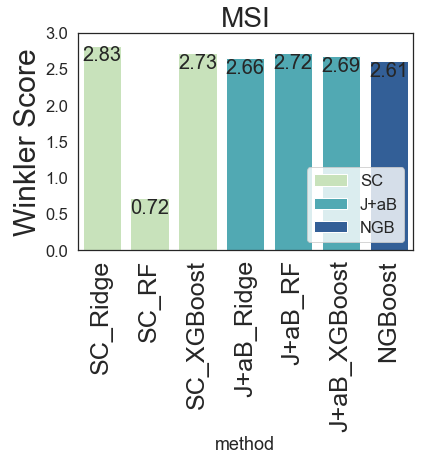

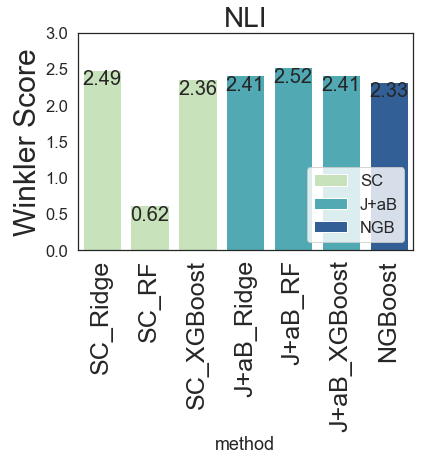

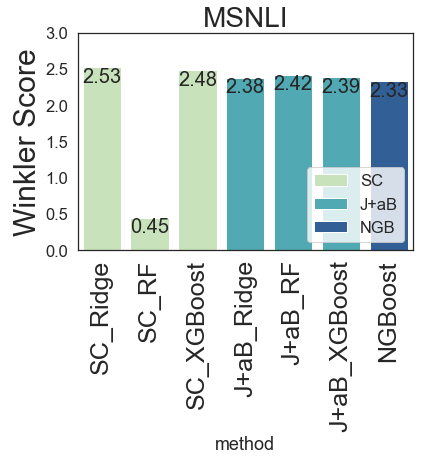

In [32]:
interval_plot(plot_name = 'p_picp_ms.png', data = df_PCA_ms, indicator = 'PICP', title = 'MSI', legend_loc = 'lower right')
interval_plot(plot_name = 'p_picp_nl.png', data = df_PCA_nl, indicator = 'PICP', title = 'NLI', legend_loc = 'lower right')
interval_plot(plot_name = 'p_picp_msnl.png', data = df_PCA_msnl, indicator = 'PICP', title = 'MSNLI', legend_loc = 'lower right')
interval_plot(plot_name = 'p_pinaw_ms.png', data = df_PCA_ms, indicator = 'PINAW', title = 'MSI', legend_loc = 'lower right')
interval_plot(plot_name = 'p_pinaw_nl.png', data = df_PCA_nl, indicator = 'PINAW', title = 'NLI', legend_loc = 'lower right')
interval_plot(plot_name = 'p_pinaw_msnl.png', data = df_PCA_msnl, indicator = 'PINAW', title = 'MSNLI', legend_loc = 'lower right')
interval_plot(plot_name = 'p_cwc_ms.png', data = df_PCA_ms, indicator = 'CWC', title = 'MSI', legend_loc = 'upper right')
interval_plot(plot_name = 'p_cwc_nl.png', data = df_PCA_nl, indicator = 'CWC', title = 'NLI', legend_loc = 'upper right')
interval_plot(plot_name = 'p_cwc_msnl.png', data = df_PCA_msnl, indicator = 'CWC', title = 'MSNLI', legend_loc = 'upper right')

interval_plot(plot_name = 'p_Winkler_Score_ms.png', data = df_PCA_ms, indicator = 'Winkler_Score', title = 'MSI', legend_loc = 'lower right')
interval_plot(plot_name = 'p_Winkler_Score_nl.png', data = df_PCA_nl, indicator = 'Winkler_Score', title = 'NLI', legend_loc = 'lower right')
interval_plot(plot_name = 'p_Winkler_Score_msnl.png', data = df_PCA_msnl, indicator = 'Winkler_Score', title = 'MSNLI', legend_loc = 'lower right')

In [12]:
# interval_plot(plot_name = 'u_picp_ms.png', data = df_UMAP_ms, indicator = 'PICP', title = 'ms',legend_loc = 'lower right')
# interval_plot(plot_name = 'u_picp_nl.png', data = df_UMAP_nl, indicator = 'PICP', title = 'nl',legend_loc = 'lower right')
# interval_plot(plot_name = 'u_picp_msnl.png', data = df_UMAP_msnl, indicator = 'PICP', title = 'msnl',legend_loc = 'lower right')
# interval_plot(plot_name = 'u_pinaw_ms.png', data = df_UMAP_ms, indicator = 'PINAW', title = 'ms',legend_loc = 'lower right')
# interval_plot(plot_name = 'u_pinaw_nl.png', data = df_UMAP_nl, indicator = 'PINAW', title = 'nl',legend_loc = 'lower right')
# interval_plot(plot_name = 'u_pinaw_msnl.png', data = df_UMAP_msnl, indicator = 'PINAW', title = 'msnl',legend_loc = 'lower right')
# interval_plot(plot_name = 'u_cwc_ms.png', data = df_UMAP_ms, indicator = 'CWC', title = 'ms',legend_loc = 'upper right')
# interval_plot(plot_name = 'u_cwc_nl.png', data = df_UMAP_nl, indicator = 'CWC', title = 'nl',legend_loc = 'upper right')
# interval_plot(plot_name = 'u_cwc_msnl.png', data = df_UMAP_msnl, indicator = 'CWC', title = 'msnl',legend_loc = 'upper right')

### 95%置信水平

In [13]:
interval_95 = df_all[df_all['nominal_level']=='95']
interval_95.to_csv(os.path.join(SUM_DIR, 'interval_95.csv'), index=False)
interval_95

,PICP,PINAW,CWC,Winkler_Score,reduction,image_type,point_method,interval_method,nominal_level,method,path
0,0.896,0.423,2.055,2.825,PCA,ms,Ridge,SC,95,SC_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/95
3,0.94,0.123,0.281,0.723,PCA,ms,RF,SC,95,SC_RF,dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/95
6,0.901,0.423,1.863,2.725,PCA,ms,XGBoost,SC,95,SC_XGBoost,dhs_ooc/PCA_099/resnet_ms_pca099/SC_XGBoost/95
9,0.919,0.421,1.335,2.494,PCA,nl,Ridge,SC,95,SC_Ridge,dhs_ooc/PCA_099/resnet_nl_pca099/SC_Ridge/95
12,0.94,0.097,0.222,0.622,PCA,nl,RF,SC,95,SC_RF,dhs_ooc/PCA_099/resnet_nl_pca099/SC_RF/95
15,0.922,0.412,1.242,2.361,PCA,nl,XGBoost,SC,95,SC_XGBoost,dhs_ooc/PCA_099/resnet_nl_pca099/SC_XGBoost/95
18,0.901,0.39,1.718,2.533,PCA,msnl,Ridge,SC,95,SC_Ridge,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_Ridge/95
21,0.946,0.077,0.162,0.451,PCA,msnl,RF,SC,95,SC_RF,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_RF/95
24,0.905,0.389,1.587,2.483,PCA,msnl,XGBoost,SC,95,SC_XGBoost,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_XGBoost/95
27,0.929,0.483,1.299,2.657,PCA,ms,Ridge,J_aB,95,J_aB_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_Ridge/95


### 90%置信水平

In [14]:
interval_90 = df_all[df_all['nominal_level']=='90']
interval_90.to_csv(os.path.join(SUM_DIR, 'interval_90.csv'), index=False)
interval_90

,PICP,PINAW,CWC,Winkler_Score,reduction,image_type,point_method,interval_method,nominal_level,method,path
1,0.779,0.303,6.543,2.517,PCA,ms,Ridge,SC,90,SC_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/90
4,0.886,0.09,0.218,0.567,PCA,ms,RF,SC,90,SC_RF,dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/90
7,0.785,0.304,5.693,2.433,PCA,ms,XGBoost,SC,90,SC_XGBoost,dhs_ooc/PCA_099/resnet_ms_pca099/SC_XGBoost/90
10,0.823,0.308,2.419,2.176,PCA,nl,Ridge,SC,90,SC_Ridge,dhs_ooc/PCA_099/resnet_nl_pca099/SC_Ridge/90
13,0.889,0.066,0.153,0.48,PCA,nl,RF,SC,90,SC_RF,dhs_ooc/PCA_099/resnet_nl_pca099/SC_RF/90
16,0.824,0.302,2.321,2.084,PCA,nl,XGBoost,SC,90,SC_XGBoost,dhs_ooc/PCA_099/resnet_nl_pca099/SC_XGBoost/90
19,0.794,0.281,4.258,2.233,PCA,msnl,Ridge,SC,90,SC_Ridge,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_Ridge/90
22,0.895,0.056,0.119,0.35,PCA,msnl,RF,SC,90,SC_RF,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_RF/90
25,0.797,0.28,3.957,2.198,PCA,msnl,XGBoost,SC,90,SC_XGBoost,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_XGBoost/90
28,0.865,0.383,1.302,2.283,PCA,ms,Ridge,J_aB,90,J_aB_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_Ridge/90


### 80%置信水平

In [15]:
interval_80 = df_all[df_all['nominal_level']=='80']
interval_80.to_csv(os.path.join(SUM_DIR, 'interval_80.csv'), index=False)
interval_80

,PICP,PINAW,CWC,Winkler_Score,reduction,image_type,point_method,interval_method,nominal_level,method,path
2,0.542,0.173,109.63,2.191,PCA,ms,Ridge,SC,80,SC_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/SC_Ridge/80
5,0.78,0.06,0.159,0.429,PCA,ms,RF,SC,80,SC_RF,dhs_ooc/PCA_099/resnet_ms_pca099/SC_RF/80
8,0.533,0.169,134.076,2.17,PCA,ms,XGBoost,SC,80,SC_XGBoost,dhs_ooc/PCA_099/resnet_ms_pca099/SC_XGBoost/80
11,0.585,0.177,38.398,1.902,PCA,nl,Ridge,SC,80,SC_Ridge,dhs_ooc/PCA_099/resnet_nl_pca099/SC_Ridge/80
14,0.79,0.04,0.091,0.348,PCA,nl,RF,SC,80,SC_RF,dhs_ooc/PCA_099/resnet_nl_pca099/SC_RF/80
17,0.572,0.169,50.678,1.878,PCA,nl,XGBoost,SC,80,SC_XGBoost,dhs_ooc/PCA_099/resnet_nl_pca099/SC_XGBoost/80
20,0.555,0.162,74.219,1.938,PCA,msnl,Ridge,SC,80,SC_Ridge,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_Ridge/80
23,0.792,0.037,0.082,0.261,PCA,msnl,RF,SC,80,SC_RF,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_RF/80
26,0.552,0.159,78.506,1.921,PCA,msnl,XGBoost,SC,80,SC_XGBoost,dhs_ooc/PCA_099/resnet_msnl_pca099/SC_XGBoost/80
29,0.744,0.278,1.405,1.876,PCA,ms,Ridge,J_aB,80,J_aB_Ridge,dhs_ooc/PCA_099/resnet_ms_pca099/J_aB_Ridge/80
